Ở chương 8 ta đã xem xét các nhiệm vụ học không giám sát phổ biến nhất: dimensionality reduction. Sau đây là một số các nhiệm vụ học không giám sát khác

**Clustering**

Mục tiêu là nhóm các thực thể tương tự lại với nhau thành các cụm (clusters).
Phân cụm là một công cụ tuyệt vời cho các ứng dụng như:

- Phân tích dữ liệu,
- Phân khúc khách hàng,
- Hệ thống gợi ý,
- Công cụ tìm kiếm,
- Phân đoạn hình ảnh,
- Học bán giám sát,
- Giảm số chiều dữ liệu, và còn nhiều hơn nữa.

**Anomaly detection (Phát hiện bất thường – còn gọi là phát hiện ngoại lệ)**

Mục tiêu là học xem dữ liệu “bình thường” trông như thế nào, và từ đó phát hiện ra những điểm bất thường. Các điểm này được gọi là anomalies hoặc outliers (dị biệt), trong khi những điểm bình thường được gọi là inliers.

Phát hiện bất thường rất hữu ích trong nhiều ứng dụng, ví dụ như:
- Phát hiện gian lận,
- Phát hiện sản phẩm lỗi trong sản xuất,
- Xác định xu hướng mới trong chuỗi thời gian,
- Loại bỏ ngoại lệ khỏi bộ dữ liệu trước khi huấn luyện mô hình khác (có thể giúp cải thiện hiệu suất của mô hình rất nhiều).

**Density estimation (Ước lượng mật độ)**

Đây là nhiệm vụ ước lượng hàm mật độ xác suất (probability density function - PDF) của quá trình ngẫu nhiên đã sinh ra bộ dữ liệu.

Ước lượng mật độ thường được dùng cho phát hiện bất thường:
→ Những điểm dữ liệu nằm trong vùng có mật độ rất thấp thường là điểm dị biệt (anomalies).

Nó cũng rất hữu ích cho:
- Phân tích dữ liệu,
- Trực quan hóa dữ liệu.

# Clustering Algorithms: k-means and DBSCAN


Khi bạn đang đi dạo trong núi, bạn tình cờ bắt gặp một loài cây mà bạn chưa từng thấy trước đây. Bạn nhìn xung quanh và thấy thêm vài cây nữa. Chúng không hoàn toàn giống hệt nhau, nhưng đủ giống để bạn biết rằng chúng rất có thể thuộc cùng một loài (hoặc ít nhất là cùng một chi).
Bạn có thể cần một nhà thực vật học để xác định chúng thuộc loài nào, nhưng bạn chắc chắn không cần chuyên gia để nhận ra nhóm các vật thể trông giống nhau.
Việc này gọi là phân cụm (clustering): nhiệm vụ nhận diện các điểm dữ liệu tương tự và gán chúng vào các cụm (clusters) — tức là các nhóm có các điểm tương tự nhau.

Giống như trong phân loại (classification), mỗi điểm dữ liệu được gán vào một nhóm. Tuy nhiên, khác với phân loại, phân cụm là một nhiệm vụ học không giám sát (unsupervised learning).

In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

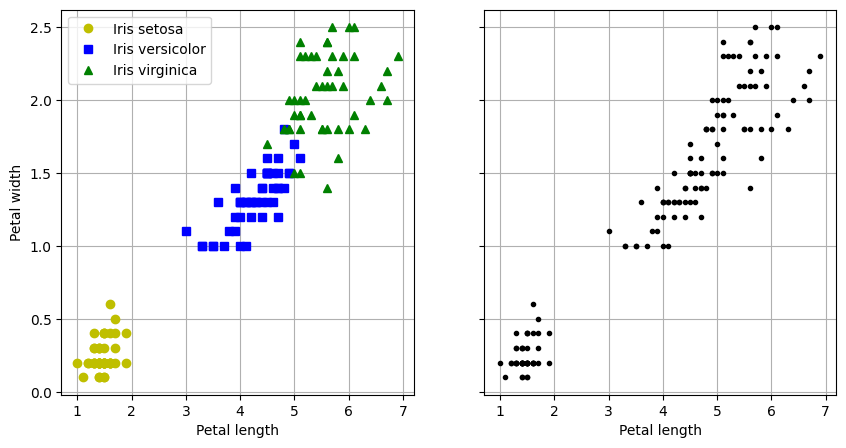

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid(True)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()


HÌnh bên trái là tập dữ liệu iris có được gắn nhãn, thích hợp cho các thuật toán phân loại như Logistic Regression, SVMs, hoặc Random Forests. Hình bên phải cùng tập dữ liệu nhưng không có nhãn nên không thể sử dụng các thuật toán phân loại. 

Đây là lúc các thuật toán phân cụm phát huy hiệu quả. Ta có thể thấy
- Cụm phía dưới bên trái
- Cụm phía trên bên phải có hai cụm con khó phân biệt hơn

Thực tế là tập dữ liệu có hai đặc trưng khác (Sepal length và Sepal width) không được hiển thị ở đây, và các thuật toán phân cụm có thể khai thác tất cả các đặc trưng, nên chúng vẫn xác định được 3 cụm khá chính xác.


Phân cụm được ứng dụng rất rộng rãi bao gồm:


    Customer segmentation (Phân khúc khách hàng)

Bạn có thể phân cụm khách hàng của mình dựa trên lịch sử mua hàng và hoạt động của họ trên trang web. Điều này giúp bạn hiểu khách hàng là ai và họ cần gì, từ đó bạn có thể điều chỉnh sản phẩm và chiến dịch tiếp thị phù hợp với từng phân khúc.
Ví dụ, việc phân khúc khách hàng có thể rất hữu ích trong hệ thống gợi ý (recommender systems) để đề xuất những nội dung mà người dùng trong cùng một cụm thường thích.


    Phân tích dữ liệu (Data analysis)

Khi phân tích một tập dữ liệu mới, việc chạy một thuật toán phân cụm trước, sau đó phân tích từng cụm riêng biệt, có thể rất hữu ích.


    Giảm chiều dữ liệu (Dimensionality reduction)

Khi một tập dữ liệu đã được phân cụm, ta thường có thể đo được độ tương thích (affinity) của mỗi điểm dữ liệu với từng cụm — tức là mức độ mà điểm đó “phù hợp” với từng cụm.
Vector đặc trưng x của mỗi điểm dữ liệu sau đó có thể được thay thế bằng vector thể hiện độ tương thích của nó với các cụm.
Nếu có k cụm, thì vector mới là vector k chiều. Vector mới này thường có số chiều ít hơn nhiều so với vector đặc trưng ban đầu, nhưng vẫn giữ được thông tin đủ để xử lý tiếp.

    Kỹ thuật trích xuất đặc trưng (Feature engineering)

Các độ tương thích với cụm có thể được dùng như những đặc trưng phụ trợ.
Ví dụ, chúng ta đã dùng k-means trong Chương 2 để thêm đặc trưng tương thích địa lý vào tập dữ liệu nhà ở California, và điều này giúp cải thiện hiệu suất mô hình.

    Phát hiện bất thường (Anomaly detection / outlier detection)

Bất kỳ điểm dữ liệu nào có độ tương thích thấp với tất cả các cụm đều có khả năng là bất thường.
Ví dụ, nếu bạn phân cụm người dùng của website theo hành vi, bạn có thể phát hiện người dùng có hành vi bất thường, như số lượng yêu cầu trên giây cao bất thường.

    Học bán giám sát (Semi-supervised learning)

Nếu bạn chỉ có một vài nhãn (label), bạn có thể thực hiện phân cụm và truyền nhãn cho tất cả các mẫu thuộc cùng một cụm.
Kỹ thuật này có thể tăng đáng kể số lượng nhãn cho thuật toán học có giám sát sau đó, từ đó cải thiện hiệu suất mô hình.

    Công cụ tìm kiếm (Search engines)

Một số công cụ tìm kiếm cho phép bạn tìm hình ảnh tương tự với một hình ảnh mẫu.
Để xây dựng hệ thống như vậy, bạn sẽ áp dụng thuật toán phân cụm lên toàn bộ hình ảnh trong cơ sở dữ liệu: các ảnh giống nhau sẽ rơi vào cùng một cụm.
Khi người dùng cung cấp một ảnh mẫu, bạn chỉ cần sử dụng mô hình phân cụm đã huấn luyện để tìm cụm của ảnh đó, và trả về tất cả các ảnh trong cùng cụm.

    Phân đoạn ảnh (Image segmentation)
Bằng cách phân cụm các điểm ảnh theo màu sắc, sau đó thay thế màu từng điểm ảnh bằng màu trung bình của cụm mà nó thuộc về, ta có thể giảm đáng kể số lượng màu trong ảnh.
Phân đoạn ảnh được sử dụng trong nhiều hệ thống phát hiện và theo dõi đối tượng, vì nó giúp xác định viền của mỗi vật thể dễ dàng hơn.

Không có một định nghĩa duy nhất nào cho cụm là gì: nó phụ thuộc vào ngữ cảnh, và các thuật toán khác nhau sẽ phát hiện các loại cụm khác nhau.

- Một số thuật toán tìm các mẫu dữ liệu tập trung quanh một điểm — gọi là trung tâm (centroid).

- Một số khác tìm vùng dày đặc các điểm dữ liệu gần nhau — các cụm này có thể có hình dạng bất kỳ.

- Một số thuật toán có tính chất phân cấp, tìm các cụm của các cụm. Và còn nhiều loại khác nữa.



## k-means

In [68]:
# generate data

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)


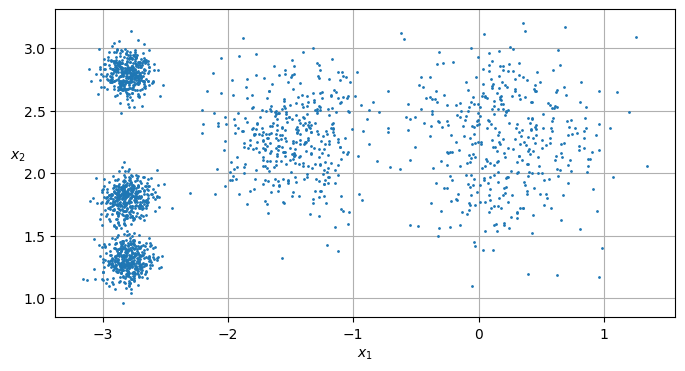

In [69]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [70]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=5)
y_pred = kmeans.fit_predict(X)
y_pred


array([0, 2, 1, ..., 3, 1, 2], dtype=int32)

In [71]:
y_pred is kmeans.labels_

True

In [72]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348]])

In [73]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

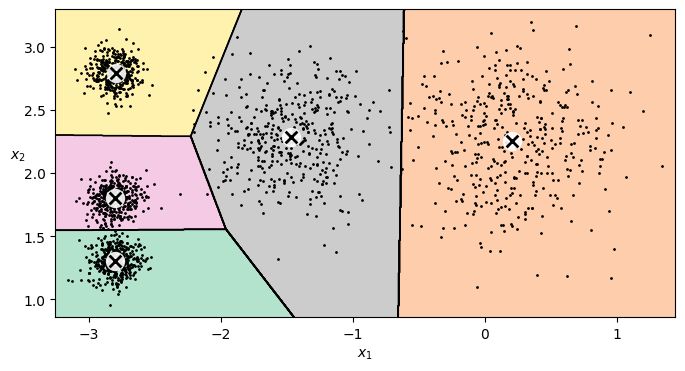

In [74]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Hard Clustering vs Soft Clustering

Phần lớn các mẫu đều được gán đúng vào cụm tương ứng, nhưng một vài mẫu có thể đã bị gán sai, đặc biệt là gần ranh giới giữa cụm phía trên bên trái và cụm trung tâm. Thật vậy, thuật toán k-means hoạt động không tốt khi các cụm có đường kính rất khác nhau, vì nó chỉ quan tâm đến khoảng cách từ mẫu đến tâm cụm (centroid) khi quyết định gán cụm. Thay vì gán mỗi mẫu vào duy nhất một cụm (gọi là **hard clustering**), có thể hữu ích nếu gán cho mỗi mẫu một điểm số cho từng cụm, gọi là **soft clustering**. Điểm số này có thể là khoảng cách giữa mẫu và tâm cụm, hoặc điểm số tương đồng (affinity), ví dụ như hàm Gaussian RBF đã được dùng ở Chương 2.

In [75]:
# kmeans.transform is used to get the distance to the centroid of each cluster

kmeans.transform(X_new).round(2)


array([[2.89, 0.33, 2.81, 2.9 , 1.49],
       [5.84, 2.8 , 5.81, 5.85, 4.48],
       [1.71, 3.29, 1.21, 0.29, 1.69],
       [1.22, 3.22, 0.73, 0.36, 1.55]])

Nếu có một tập dữ liệu nhiều chiều, sau khi biến đổi theo cách này, ta sẽ thu được một tập dữ liệu k-chiều (k là số cụm). Ngoài ra khoảng cách này có thể được sử dụng là feature phụ cho việc huấn luyện mô hình khác.

### The k-means algorithm

Giả sử bạn đã có sẵn các tâm cụm (centroids). Khi đó, bạn có thể dễ dàng gán nhãn cho tất cả các điểm trong tập dữ liệu bằng cách gán mỗi điểm vào cụm có tâm gần nhất.

Ngược lại, nếu bạn có sẵn nhãn cho tất cả các điểm, bạn cũng có thể tính được tâm cụm bằng cách tính trung bình các điểm thuộc cụm đó.
Nhưng trong thực tế bạn không có cả nhãn lẫn tâm cụm, vậy làm thế nào?

Hãy khởi tạo ngẫu nhiên các tâm cụm (ví dụ, chọn ngẫu nhiên k điểm trong dữ liệu và dùng vị trí của chúng làm tâm cụm ban đầu). Sau đó:

1. Gán nhãn cho các điểm (dựa trên tâm cụm gần nhất),
2. Cập nhật lại tâm cụm (tính trung bình của các điểm trong cụm),
3. Lặp lại việc gán nhãn và cập nhật tâm cụm cho đến khi tâm cụm không còn thay đổi.

Thuật toán được đảm bảo hội tụ sau một số bước hữu hạn (thường khá ít). Lý do là vì khoảng cách bình phương trung bình giữa các điểm và tâm cụm gần nhất chỉ có thể giảm hoặc giữ nguyên sau mỗi bước, và vì giá trị này không thể âm, nên thuật toán chắc chắn sẽ hội tụ




**Note:** độ phức tạp tính toán của thuật toán thường tuyến tính theo số lượng instances $m$, số lượng features $n$, và số lượng cụm $k$.


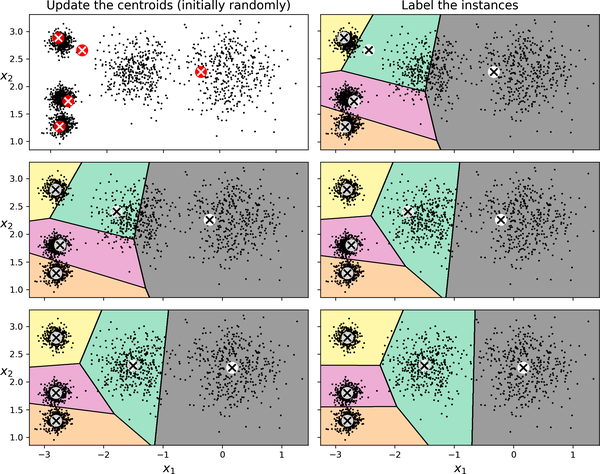

Mặc dù thuật toán có thể được đảm bảo sẽ hội tụ, nhưng có thể sự hội tụ không phải là kết quả đúng (có thể hội tụ ở local minimum): nó phụ thuộc vào các điểm tâm khởi tạo

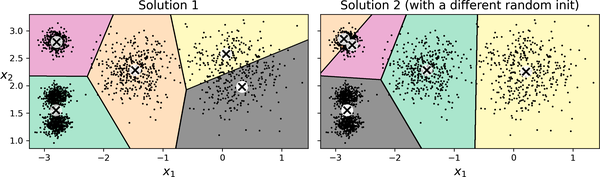

Hãy cùng xem xét một số cách bạn có thể giảm thiểu rủi ro này bằng cách cải thiện khởi tạo tâm

### Centroid initialization methods

In [76]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

Một cách khác là chạy thuật toán nhiều lần với các tâm khơi tạo khác nhau. Nó được kiểm soát bởi `n_init` hyperparameter

In [77]:
# which is the sum of the squared distances between the instances and their closest centroids

kmeans.inertia_

211.59853725816836

In [78]:
kmeans.score(X)

-211.59853725816836

Một cải tiến quan trọng đối với thuật toán k-means, k-means++. Một cách khởi tạo thông minh hơn, có xu hướng chọn các tâm cụm (centroid) ở xa nhau, và cải tiến này làm cho thuật toán k-means ít có khả năng hội tụ đến một giải pháp dưới mức tối ưu. Thuật toán khởi tạo k-means++ hoạt động như sau:

1. Chọn một tâm $\mathbf{c}^{(1)}$ ngẫu nhiên từ tập dữ liệu
2. Chọn tâm cụm mới $\mathbf{c}^{(i)}$, chọn một mẫu $\mathbf{x}^{(i)}$ với xác suất $D(\mathbf{x}^{(i)})^2 / \sum^{m}_{j=1} D(\mathbf{x}^{(j)})^2$, với $D(\mathbf{x}^{(i)})$ là khoảng cách mẫu $\mathbf{x}^{(i)}$ và tâm gần nhất đã được chọn. Phân phối xác suất này đảm bảo rằng các trường hợp ở xa tâm đã chọn hơn có nhiều khả năng được chọn làm tâm hơn.
3. Lặp lại đến khi chọn được $k$ tâm


Class `KMeans` sử dụng thuật toán này khi khởi tạo mặc định

### Accelerated k-means and mini-batch k-means

Một cách khác để cải thiện thuật toán k-means. Trong một số bộ dữ liệu rất lớn Trên các tập dữ liệu lớn có nhiều cụm, thuật toán có thể được tăng tốc bằng cách tránh nhiều phép tính khoảng cách không cần thiết. Elkan đã đạt được điều này bằng cách khai thác bất đẳng thức tam giác (tức là, một đường thẳng luôn là khoảng cách ngắn nhất giữa hai điểm) và bằng cách theo dõi các giới hạn trên và dưới cho khoảng cách giữa các điểm và các tâm cụm. Tuy nhiên, thuật toán của Elkan không phải lúc nào cũng tăng tốc độ huấn luyện, và đôi khi nó còn có thể làm chậm quá trình huấn luyện một cách đáng kể; điều này phụ thuộc vào tập dữ liệu. Dù vậy, nếu bạn muốn thử, hãy đặt tham số `algorithm="elkan"`

Một cải tiến quan trọng khác của thuật toán k-means đã được đề xuất trong một bài báo năm 2010 của David Sculley. Thay vì sử dụng toàn bộ tập dữ liệu ở mỗi vòng lặp, thuật toán này sử dụng các lô nhỏ (mini-batches), di chuyển các tâm cụm một chút ở mỗi vòng lặp. Điều này giúp tăng tốc thuật toán (thường nhanh hơn từ ba đến bốn lần) và giúp ta có thể phân cụm các tập dữ liệu khổng lồ không vừa trong bộ nhớ. Scikit-Learn triển khai thuật toán này trong lớp `MiniBatchKMeans`, mà bạn có thể sử dụng tương tự như lớp `KMeans`

In [79]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

Nếu tập dữ liệu không vừa trong bộ nhớ, lựa chọn đơn giản nhất là sử dụng phương thức memmap như chúng ta đã làm cho Incremental PCA. Hoặc, bạn có thể truyền từng lô nhỏ một vào phương thức `partial_fit()`, nhưng cách này sẽ cần nhiều công sức hơn, vì bạn sẽ cần thực hiện nhiều lần khởi tạo và tự mình chọn ra lần tốt nhất.

Mặc dù thuật toán mini-batch k-means nhanh hơn nhiều so với thuật toán k-means thông thường, nhưng quán tính (inertia) của nó lại tệ hơn một chút.

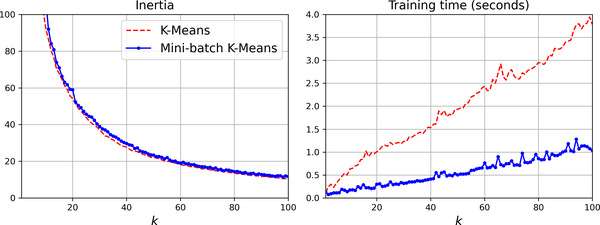

### Finding the optimal number of clusters

Đến nay, chúng ta đã đặt số cụm k bằng 5 vì khi nhìn vào dữ liệu, có thể thấy rõ đây là số cụm chính xác. Nhưng nhìn chung, việc xác định giá trị cho k sẽ không dễ dàng như vậy, và kết quả có thể sẽ khá tệ nếu bạn đặt sai giá trị. Như hình dưới đây với tập dữ liệu này, việc đặt k bằng 3 hoặc 8 đều cho ra các mô hình khá tệ.

Ta nghĩ rằng chỉ cần chọn mô hình có quán tính (inertia) thấp nhất, nhưng với k = 8 inertia = 119.1, chỉ số này không phải một chỉ số hiệu suất tốt vì nó sẽ giảm khi k tăng. Thật vậy, càng có nhiều cụm, mỗi điểm dữ liệu sẽ càng gần với tâm cụm gần nhất của nó, và do đó quán tính sẽ càng thấp.

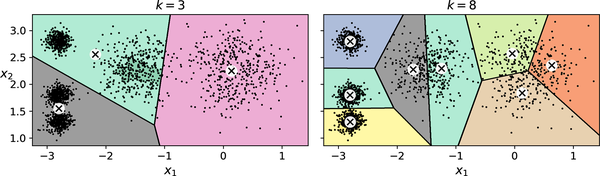

Hãy vẽ biểu đồ quán tính như một hàm của k. Khi làm vậy, đường cong thường chứa một điểm uốn được gọi là điểm khuỷu (elbow)

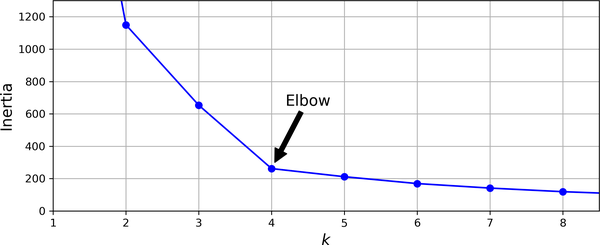

Như bạn có thể thấy, quán tính (inertia) giảm rất nhanh khi chúng ta tăng k lên đến 4, nhưng sau đó nó giảm chậm hơn nhiều khi chúng ta tiếp tục tăng k. Đường cong này có hình dạng gần giống một cánh tay, và có một điểm khuỷu (elbow) tại k = 4. Vì vậy, nếu chúng ta không biết rõ hơn, chúng ta có thể nghĩ rằng 4 là một lựa chọn tốt: bất kỳ giá trị nào thấp hơn sẽ không hiệu quả bằng, trong khi bất kỳ giá trị nào cao hơn sẽ không giúp ích được nhiều, và chúng ta có thể chỉ đang chia tách các cụm vốn đã hoàn hảo ra làm đôi mà không có lý do chính đáng.

Kỹ thuật chọn giá trị tốt nhất cho số cụm này khá là sơ lược. Một cách tiếp cận chính xác hơn (nhưng cũng tốn kém hơn về mặt tính toán) là sử dụng silhouette score, đây là giá trị trung bình của hệ số silhouette (silhouette coefficient) trên tất cả các điểm dữ liệu. Hệ số silhouette của một điểm dữ liệu được tính bằng công thức `(b - a) / max(a, b)`, trong đó a là khoảng cách trung bình đến các điểm khác trong cùng một cụm (tức là, khoảng cách trung bình nội cụm - mean intra-cluster distance) và b là khoảng cách trung bình đến các điểm của cụm gần nhất tiếp theo (mean nearest-cluster distance), được định nghĩa là cụm tối thiểu hóa giá trị b, không bao gồm cụm của chính điểm dữ liệu đó.

Hệ số silhouette có thể thay đổi từ -1 đến +1. Một hệ số gần với +1 có nghĩa là điểm dữ liệu nằm sâu bên trong cụm của nó và ở xa các cụm khác. Trong khi đó, một hệ số gần với 0 có nghĩa là nó nằm gần ranh giới của một cụm. Cuối cùng, một hệ số gần với -1 có nghĩa là điểm dữ liệu đó có thể đã bị gán nhầm cụm.

Để tính toán điểm silhouette, bạn có thể sử dụng hàm silhouette_score() của Scikit-Learn, cung cấp cho nó tất cả các điểm dữ liệu trong tập dữ liệu và các nhãn đã được gán.

In [80]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

np.float64(0.655517642572828)

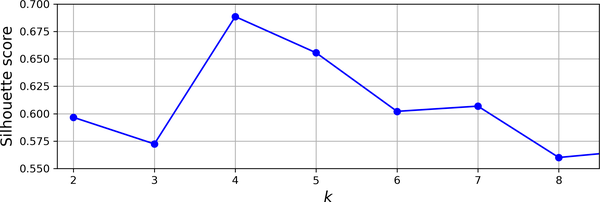

Biểu đồ này cũng cho thấy k = 4 là một lựa chọn rất tốt, và cũng làm nổi bật rằng k = 5 tốt hơn nhiều k = 6. 7 điều này không thây được thông qua biểu đồ inertia

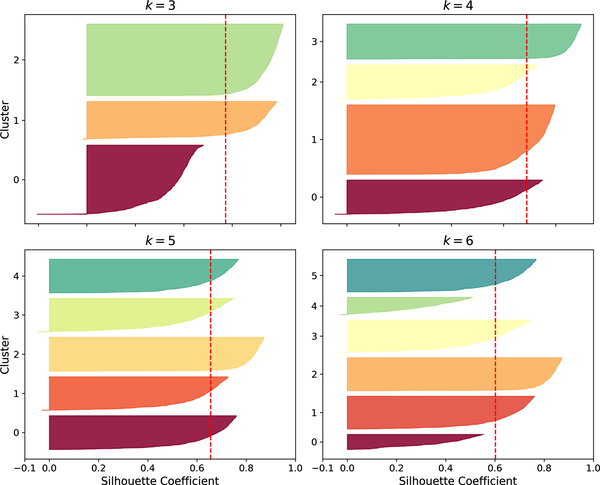

## Limit of k-means

Mặc dù có nhiều ưu điểm, đáng chú ý nhất là nhanh và có thể mở rộng, k-means không hoàn hảo. Như chúng ta đã thấy, cần phải chạy thuật toán nhiều lần để tránh các giải pháp không tối ưu, cộng với việc bạn cần chỉ định số lượng cụm, điều này có thể khá rắc rối. Hơn nữa, k-means không hoạt động tốt khi các cụm có kích thước khác nhau, mật độ khác nhau hoặc hình dạng không phải hình cầu.

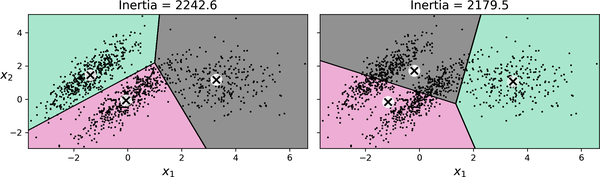

Cả 2 giải pháp đều không tốt, tùy thuộc vào dữ liệu, các thuật toán phân cụm khác nhau có thể hoạt động tốt hơn. Trên các loại cụm hình elip này, các mô hình hỗn hợp Gaussian hoạt động rất tốt.

**Lưu ý:** việc scale dữ liệu trước khi chạy k-means là rất quan trọng, hoặc các cụm sẽ bị kéo dài rất nhiều và k-means hoạt động kém. Việc scale các feature không đảm bảo các cụm sẽ đẹp và có dạng cầu nhưng nhìn chung nó có thể giúp k-means cải thiện một chút

## Using Clustering for Image Segmentation

**Image Segmentation** là nhiệm vụ phân chia hình ảnh thành nhiều phân đoạn, có một số biến thế như:

- Trong **color segmentation**, các pixel có màu tương tự được gán cho cùng một phân đoạn. Điều này hữu ích trong nhiều ứng dụng. Ví dụ, nếu bạn muốn phân tích hình ảnh vệ tinh để đo tổng diện tích rừng trong một khu vực, phân đoạn màu có thể là giải pháp tốt

- Trong **semantic segmentation**, tất cả các pixel là một phần của cùng một loại đối tượng được gán cho cùng một phân đoạn. Ví dụ, trong hệ thống thị giác của xe tự lái, tất cả các pixel là một phần của hình ảnh người đi bộ có thể được gán cho phân đoạn "người đi bộ" (sẽ có một phân đoạn chứa tất cả người đi bộ).



Sau đây sẽ là bài toán phân loại màu đơn giản

In [81]:
import PIL

filepath = r'.\images\unsuperviesd_learning\ladybug.png'
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [82]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)



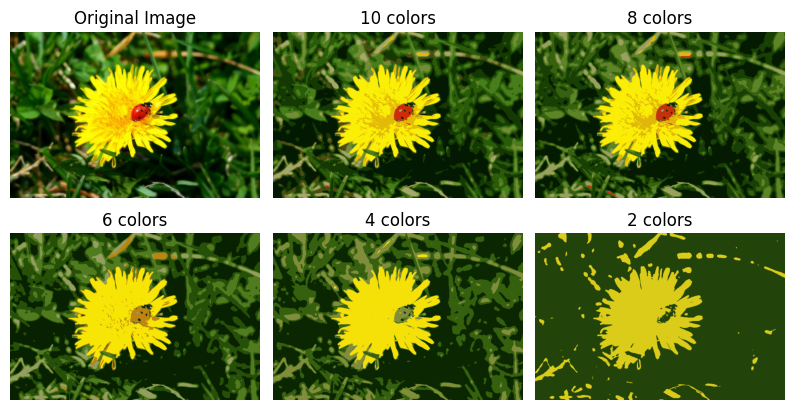

In [83]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n_cluster in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_cluster} colors")
    plt.axis('off')

plt.show()

## Using Clustering for Semi-Supervised Learning

Một trường hợp khác sử dụng clustering là học bán giám sát, khi chúng ta có đa số là các mẫu không nhãn, chỉ một ít có nhãn

In [84]:
# using mini-MNIST

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Chúng ta sẽ giả sử chúng ta chỉ có nhãn cho 50 trường hợp. Để có được baseline, hãy đào tạo một mô hình hồi quy logistic trên 50 trường hợp được gắn nhãn này:

In [85]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000, n_init)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

SyntaxError: positional argument follows keyword argument (4206914546.py, line 4)

In [71]:
log_reg.score(X_test, y_test)

0.7581863979848866

Độ chính xác chỉ đạt 76%. -> Cải thiện nó với cluster.

In [72]:
# cluster training set with k=50. Then each cluster find the closest image and call it is *representative images*

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # contains the distance to each cluster center
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # index of the closest image to each cluster center
X_representative_digits = X_train[representative_digit_idx] # representative images

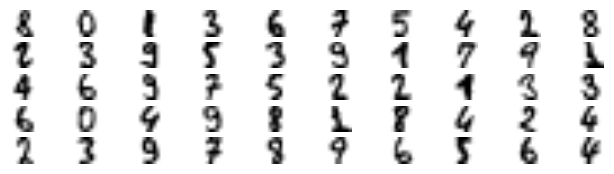

In [75]:
plt.figure(figsize=(8, 2))
for index, representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.axis('off')

plt.show()